# Titanic DataSet

- It contains details of passengers aboard the Titanic such as age, gender, class, fare, and survival status etc.
* Goal : Clean the data set to make it ready for analysis.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
titanic = sns.load_dataset('titanic') # loading the titanic dataset
# print(titanic.head(10)) # first ten rows
# print(titanic.info()) # shows the column count and datatype 
print(titanic.describe()) # this shows the mean,min,max,std and others of each numeric column.

# after looking at the age column it's clear that age has a lot of missing or nan values, so we'll treat that first
# the deck column also has very low count meaning it has a lot many nans or missing values.
# embarked & embarked_town both has few nan or missing values so need to look on that too.
# then we can see that the sex column has object type we need to change that to 0 and 1 (0 for male and 1 for female) for better analysis.
# we look into fare column for outliers

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


## Removing duplicates.
Before treating the NaN,missing values or any other errors, we must remove the duplicate rows.
Right now we have 891 rows and there could be multiple duplicate columns.

In [6]:
print(titanic.shape[0]) # for checking number of rows
# so we confirmed we have a total of 891 rows.Now we'll remove the duplicates and how many remains.
titanic.drop_duplicates(inplace=True) # this will remove the duplicate passengers and store the unique ones in the that variable.
print(titanic.shape[0])

# removed the duplicates from the set As we can see had 891 and it came as 784.Now are going to treat the others things for smooth analysis.

891
784


## Treating AGE

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     784 non-null    int64   
 1   pclass       784 non-null    int64   
 2   sex          784 non-null    object  
 3   age          678 non-null    float64 
 4   sibsp        784 non-null    int64   
 5   parch        784 non-null    int64   
 6   fare         784 non-null    float64 
 7   embarked     782 non-null    object  
 8   class        784 non-null    category
 9   who          784 non-null    object  
 10  adult_male   784 non-null    bool    
 11  deck         202 non-null    category
 12  embark_town  782 non-null    object  
 13  alive        784 non-null    object  
 14  alone        784 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 77.0+ KB
None


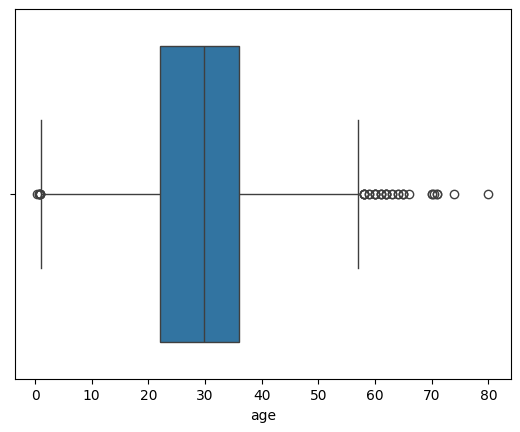

In [7]:
# before treating for NaN or missing value and Outliers we check once more how removing duplicates has changed its proption of missing values.

print(titanic.info()) # it's clear age,deck,embark,and embark_town needs attention the most.
titanic['age'] = titanic['age'].fillna(titanic['age'].mean()) # filled the age with mean of the overall ages. didn't remove outliers here because if we apply the domain knowledge they become important for analysis.
sns.boxplot(x='age',data=titanic) 
plt.show() # even though we have outliers we don't remove them because they are valid data, as there could've been wealthy older passengers on the titanic


## Treating DECK

In [8]:
# Checking once for total and number of decks.

print(f"Total passengers: {titanic.shape[0]}\nDecks for passengers: {titanic['deck'].count()}")
# We should've same number of deck as passengers meaning we have missing values in the deck.
# We can treat it by assining 'Uknown' so that the data won't be biased towards one deck.
titanic['deck'] = titanic['deck'].cat.add_categories(['unknown'])
titanic['deck'] = titanic['deck'].fillna('unknown')
print(titanic['deck'].value_counts())

Total passengers: 784
Decks for passengers: 202
deck
unknown    582
C           59
B           46
D           33
E           32
A           15
F           13
G            4
Name: count, dtype: int64


# Treating Embarked and Embarked town
has only two misisng values can be done with mode without being biased towards the data.

In [9]:
print(f"Total passengers : {titanic.shape[0]}\nEmbarked and Embarked Town : {titanic['embarked'].count()}")
# embarked and embarked_town has two missing values but if left untreated can be problematic during analyis.

titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])
print(titanic['embark_town'].count())

Total passengers : 784
Embarked and Embarked Town : 782
784


Checking for outliers in Fare.

Min fare : 0.0
Max fare : 512.3292


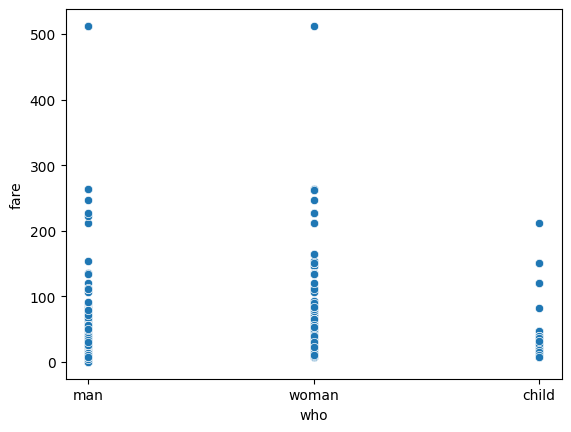

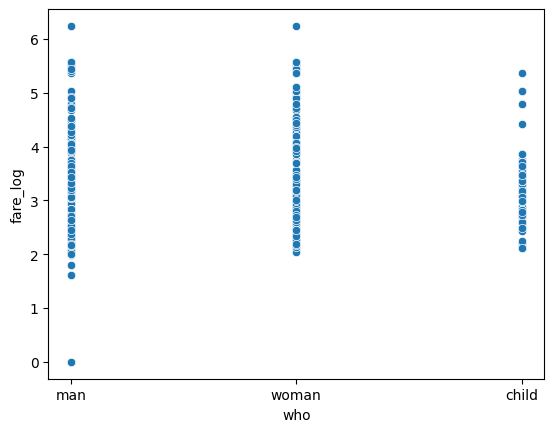

In [10]:
# sns.boxplot(x='fare',data=titanic)
# plt.show()
# print(titanic.groupby('sibsp')['fare'].value_counts())
# print(titanic['sibsp'].value_counts())
print(f"Min fare : {titanic['fare'].min()}\nMax fare : {titanic['fare'].max()}")
# this tells that the minium fare was 0 and maximum was 512.3292 we can either treat them as outliers or use domain knowledge as
# 0 fare could've been the family memebrs of the cabin or crew or maybe of some crew member and the high fare of 512 can be some wealthy person
# who had booked a luxuries suite, these could've been the case so  
sns.scatterplot(x='who',y='fare',data=titanic)
plt.show()
# the scatterplot shows fare distibution among the man/woman/child and keeping the high prices makes more sense for data cleaning but
# for the later analysis we should reduce the skewness .
titanic['fare_log'] = np.log1p(titanic['fare'])
sns.scatterplot(x='who',y='fare_log',data=titanic)
plt.show()

# Analysis

- Male vs female survival rate.

sex
male      62.627551
female    37.372449
Name: proportion, dtype: float64
survived: 323
sex     survived
female  1           74.061433
        0           25.938567
male    0           78.411405
        1           21.588595
Name: proportion, dtype: float64


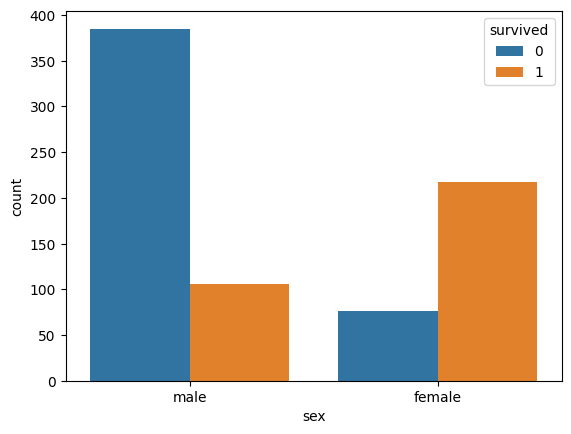

In [45]:
# who survived based on sex.

print(titanic['sex'].value_counts(normalize=True)*100) # male vs female ratio on the titanic ship
# print(titanic['survived'].isnull().sum()) checking if survived has any missing values.
print(f"survived: {titanic[titanic['survived']==1].shape[0]}")
print(titanic.groupby('sex')['survived'].value_counts(normalize=True)*100)
# 63%(491) male and 37%(293) females were onboard of (784 after removing duplicates) in which only 323 people survived out of which
# Females(293) of 74% survived and male(491) of 21% survived. Meaning out of 323 passenger who survived, female had higher survival rate.

sns.countplot(x='sex', hue='survived', data=titanic)
plt.show()

- Man vs Woman vs Child (who) survival rate.

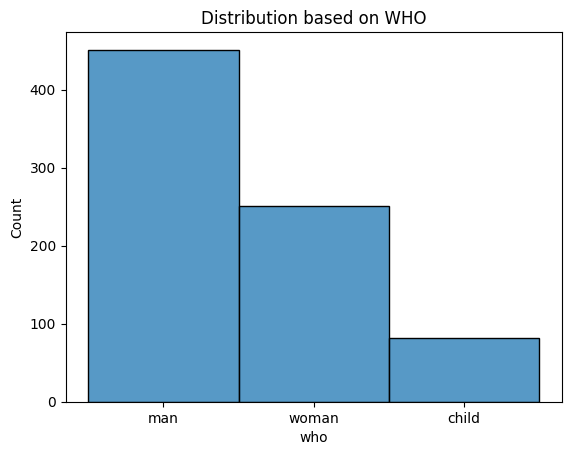

who
man      451
woman    251
child     82
Name: count, dtype: int64


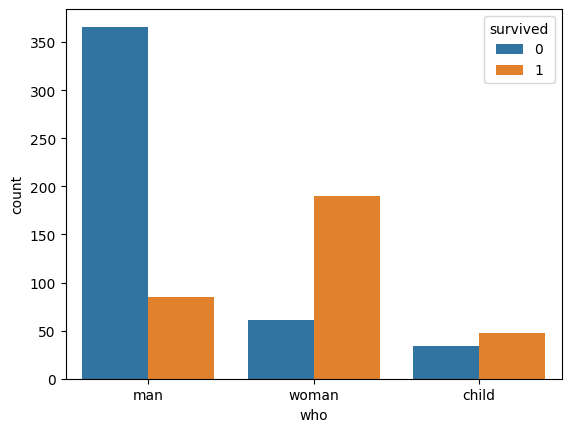

who    survived
child  1           58.536585
       0           41.463415
man    0           81.152993
       1           18.847007
woman  1           75.697211
       0           24.302789
Name: proportion, dtype: float64


In [55]:
sns.histplot(x='who',data=titanic)
plt.title('Distribution based on WHO')
plt.show()
print(titanic['who'].value_counts())
# So out of 784 passengers man were 451 , woman were 251 and children were 82

sns.countplot(x='who',hue='survived',data=titanic)
plt.show()
print(titanic.groupby('who')['survived'].value_counts(normalize=True)*100)

# so,woman has the highest survival rate of three man,woman and child with 75.6% survival rate, followed by children with 58.5%
#  out of 451 man 18.8% survied making lowest survival rate this clearly reflects the "women and children first" principle followed during evacuation.

- Adult vs children (age<18) survival rate.

Adult: 674
Children: 110

Adult survived: age    survived
False  1            60
       0            50
True   0           411
       1           263
Name: count, dtype: int64


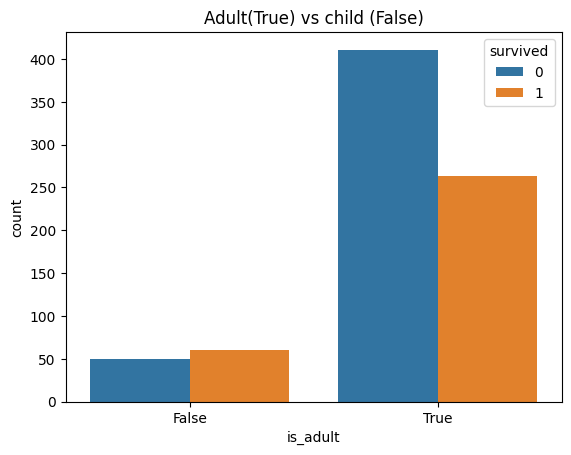

Adult survived: age    survived
False  1           54.545455
       0           45.454545
True   0           60.979228
       1           39.020772
Name: proportion, dtype: float64


In [65]:
print(f"Adult: {(titanic['age']>=18).sum()}") # Total adults onboard
print(f"Children: {(titanic['age']<18).sum()}\n") # Total children onboard

print(f"Adult survived: {(titanic.groupby((titanic['age']>=18))['survived']).value_counts()}")

titanic['is_adult'] = titanic['age'] >=18
sns.countplot(x=f'is_adult',hue='survived',data=titanic)
plt.title("Adult(True) vs child (False)")
plt.show()

print(f"Adult survived: {(titanic.groupby((titanic['age']>=18))['survived']).value_counts(normalize=True)*100}")

# Interesting find that more than 50% children survived 54.45% to be exact and
# 60% of adults survived this percentage is high dute to woman being counted if male and female adults were to be separated data would lean towards woman more from past analysis.
# Out of 110, 60 children survived and out of 674, 263 adults survived.

# Survival rate based on class.

class
Third     405
First     214
Second    165
Name: count, dtype: int64
class   survived
First   1           135
        0            79
Second  1            84
        0            81
Third   0           301
        1           104
Name: count, dtype: int64
class   survived
First   1           63.084112
        0           36.915888
Second  1           50.909091
        0           49.090909
Third   0           74.320988
        1           25.679012
Name: proportion, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10396\1919944053.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(titanic.groupby('class')['survived'].value_counts())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10396\1919944053.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(titanic.groupby('class')['survived'].value_counts(normalize=True)*100)


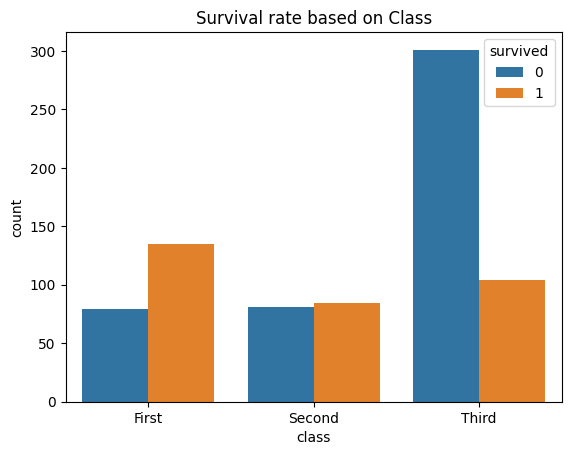

In [85]:
print(titanic['class'].value_counts()) 
#Total passengers 784(after removing duplicates),out of which 214 from first class,165 from second class and 405 from third class
# More people were on third class maybe due to low ticket price.
print(titanic.groupby('class')['survived'].value_counts())
print(titanic.groupby('class')['survived'].value_counts(normalize=True)*100)
# Even though were more people onboard in the Third class only few survived(25.6%) (1 0f 4 survived) 104 out of 405, this could've happened due to first and second class being more priortized due to being high and rich class.
# The First class has highest survival rate(63%) 135 survived out of 214. The rich and elite benefits.
# Second class more than 50% people survived. Higher connections and priority than third class.
sns.countplot(x='class',hue='survived',data=titanic)
plt.title("Survival rate based on Class")
plt.show()

# Alone vs family survival rate.

with_Family  survived
0            0           296
             1           150
1            1            85
             0            69
2            1            58
             0            43
3            1            20
             0             8
4            0            10
             1             3
5            0            19
             1             3
6            0             8
             1             4
7            0             6
10           0             2
Name: count, dtype: int64
with_Family  survived
0            0            66.367713
             1            33.632287
1            1            55.194805
             0            44.805195
2            1            57.425743
             0            42.574257
3            1            71.428571
             0            28.571429
4            0            76.923077
             1            23.076923
5            0            86.363636
             1            13.636364
6            0            66.66666

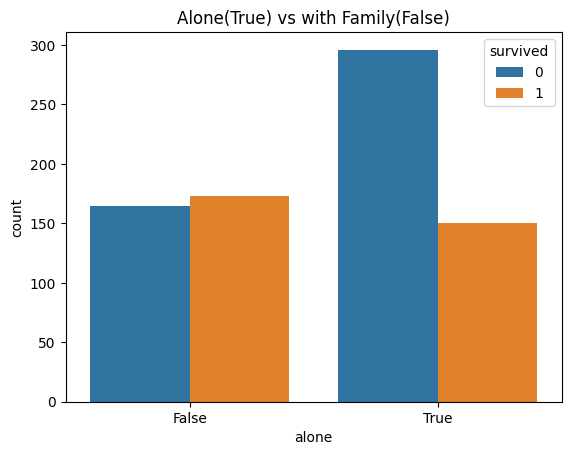

In [92]:
titanic['with_Family'] = titanic['parch'] + titanic['sibsp'] # creating family column
print(titanic.groupby('with_Family')['survived'].value_counts())
print(titanic.groupby('with_Family')['survived'].value_counts(normalize=True)*100)
# people with more family memebers had few chances of survival maybe due trying to help eachother taking more time focusing on another.
# people with 1-2 family memebers had more than 50% of survival rate due to being one or two helping eachother making faster decision.
# people with 3 members had highest survival rate maybe because it was easier for them to think make each other calm down.
# more than 3 family memebers very less survival rate and more than 5 had really low rates.
# people with 0 family memebrs has low rates than people with family memebrs maybe due to panicking and not being able to find solutions alone.

sns.countplot(x='alone',hue='survived',data=titanic)
plt.title("Alone(True) vs with Family(False)")
plt.show()

- Embarked vs Survival rate

embarked
S    570
C    155
Q     59
Name: count, dtype: int64
embarked  survived
C         1            90
          0            65
Q         0            39
          1            20
S         0           357
          1           213
Name: count, dtype: int64
embarked  survived
C         1           58.064516
          0           41.935484
Q         0           66.101695
          1           33.898305
S         0           62.631579
          1           37.368421
Name: proportion, dtype: float64


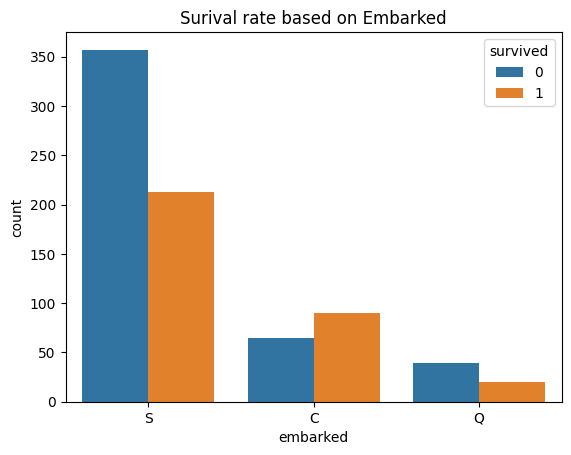

In [96]:
print(titanic['embarked'].value_counts()) # Distribution of people embarked from different places.
print(titanic.groupby('embarked')['survived'].value_counts())
print(titanic.groupby('embarked')['survived'].value_counts(normalize=True)*100)
sns.countplot(x='embarked',hue='survived',data=titanic)
plt.title("Surival rate based on Embarked")
plt.show()

# People who embarked from C (Cherbourg) has the highest survival rate(58%) Out of 155, 90 survived.
# People who embarked from S (Southampton) has low but still has a survival rate of 37%, Out of 570,213 survived.
# People who embarked from Q (Queenstown) has the lowest survival rate(33.8%), Out of 59 , only 20 survived.

- females vs class 

Total Female: 293
survived
1    217
0     76
Name: count, dtype: int64
survived
1    74.061433
0    25.938567
Name: proportion, dtype: float64


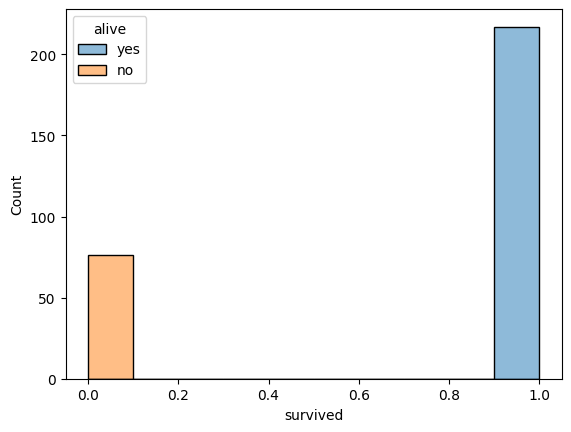

class   survived
First   1           90
        0            3
Second  1           67
        0            6
Third   0           67
        1           60
Name: count, dtype: int64
class   survived
First   1           96.774194
        0            3.225806
Second  1           91.780822
        0            8.219178
Third   0           52.755906
        1           47.244094
Name: proportion, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10396\3165660278.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(female.groupby('class')['survived'].value_counts())
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10396\3165660278.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(female.groupby('class')['survived'].value_counts(normalize=True)*100)


In [112]:
female = titanic[titanic['sex'] == 'female']
print(f"Total Female: {len(female)}")
print(female['survived'].value_counts()) # How many females survived and didn't 
print(female['survived'].value_counts(normalize=True)*100)
sns.histplot(x='survived',hue='alive',data=female)
plt.show()

# Total woman 293 out of which 217 (74%) survived and 76 (26%) didn't make it 

print(female.groupby('class')['survived'].value_counts())
print(female.groupby('class')['survived'].value_counts(normalize=True)*100)

# From the past analysis we found that females had highest survival rate among people onboard.
# Now, we can see that although female had highest rate of survival being in different class also affected it a lot.
# From the 1st Class 96.77% of females survived, Total females in the first class 93, out 93 , 90 survived and 3 couldn't make
# The first class tells being a woman and being in first class was best thing during the titanic for survival.
# From the 2nd class 91.77% females survived.Total of 73, out of which 67 survived, signifying priority females had during evacuation.
# From the 3rd class only 47% females survived, suggesting even though females had highest survival rate being one from the higher class and status
# boosted the survival rate meaning wealth and class had an affect even of female survival, as out of 127 female in third class only 60 survived
# telling the harsh truth of status monopoly during the evacuation.

# Titanic Dataset Mini Project - Findings Report
---
### Dataset Overview

- The dataset contains 891 rows, reduced to 784 unique passengers after removing duplicates.
- Columns include demographics (age, sex, class), travel details (fare, embarked, deck), and survival status.
- Age, Deck, Embarked, and Embark_Town columns had missing values that required treatment.
- Deck was filled with "Unknown", Embarked and Embark_Town filled with mode, and Age treated with mode.
- Sex column converted into numeric values (0 = male, 1 = female) for analysis.

### Fare & Outliers

- Minimum Fare: 0 (possible crew/family exception).
- Maximum Fare: 512 (likely wealthy passengers in luxury suites).
- Decided to retain outliers using domain knowledge.
- Scatterplots confirmed fares aligned with expected distributions across man/woman/child.
- For analysis, skewness was reduced by applying log transformation (fare_log).

### Survival by Sex

- Onboard ratio: 63% male (491), 37% female (293).
- Overall survival: 323 passengers survived.
- Female survival rate: ~74% (217/293).
- Male survival rate: ~21% (106/491).
> Clear evidence of "Women and children first" policy.

### Survival by Age (Adults vs Children)

- Adults: 674 passengers → 263 survived (~39%).
- Children: 110 passengers → 60 survived (~54%).
> Children had a higher chance of survival. Adults benefited mostly due to female passengers being prioritized.

### Survival by “Who” (Man/Woman/Child)

- Man: 451 passengers → survival 18.8%.
- Woman: 251 passengers → survival 75.6%.
- Child: 82 passengers → survival 58.5%.
> Confirms women had the highest survival rate, followed by children.

### Survival by Class

- 1st Class: 214 passengers → 135 survived (~63%).
- 2nd Class: 165 passengers → 84 survived (~51%).
- 3rd Class: 405 passengers → 104 survived (~25%).
> Higher class passengers had much better survival rates, showing wealth/status priority.

### Survival by Family (SibSp + Parch)

- Alone (0 family members) → lower survival rate.
- 1–2 family members → best survival chances (>50%).
- 3 family members → highest survival (~better coordination).
- 3 members → sharp decline, very low survival.
> Families were both a strength and a burden: small groups survived better, larger ones struggled.

### Survival by Embarked Location

- Cherbourg (C): 58% survived (90/155).
- Southampton (S): 37% survived (213/570).
- Queenstown (Q): 34% survived (20/59).
> Passengers from Cherbourg had the best odds, Queenstown the worst.

### Survival by Female Class

- Total women onboard: 293 → 217 survived (~74%).
- 1st Class females: 96.7% survived (90/93).
- 2nd Class females: 91.8% survived (67/73).
- 3rd Class females: 47% survived (60/127).
> Being female and higher class gave the highest survival chance.
> Harsh reality: Women in 3rd class had survival rates similar to men in higher classes.

---
## Final Insights

- Survival strongly depended on sex, age, and class.
- Women (esp. in 1st/2nd class) were prioritized.
- Children had better odds than men, but still worse than women.
- Class inequality was evident: survival correlated with wealth and status.
- Embarkation location also influenced outcomes (C > S > Q).